<a href="https://colab.research.google.com/github/YajaGen/Challenge-Telecom/blob/main/Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalando la biblioteca pandas**

In [ ]:
pip install pandas requests


In [ ]:
import pandas as pd
import requests

**Extraer los datos de la base de datos JSON**

In [ ]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)


In [ ]:
print(df. head())

print(df.info())

print(df.describe())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
# Paso 1: Detectar las columnas que contienen diccionarios
cols_to_flatten = [col for col in df.columns if isinstance(df[col].iloc[0], dict)]

print("Columnas a desanidar:", cols_to_flatten)


Columnas a desanidar: ['customer', 'phone', 'internet', 'account']


In [ ]:
# Paso 2: Crear un DataFrame base con las columnas no anidadas
df_base = df.drop(columns=cols_to_flatten).copy()

# Paso 3: Desanidar cada columna detectada automáticamente
flattened_parts = [pd.json_normalize(df[col]) for col in cols_to_flatten]

# Paso 4: Unir todo en un solo DataFrame
df_final = pd.concat([df_base] + flattened_parts, axis=1)

# Paso 5: Limpiar nombres de columnas
df_final.columns = df_final.columns.str.strip().str.lower().str.replace(' ', '_')

# Vista previa
df_final.head()


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [15]:
# 1. Valores ausentes por columna
print("Valores ausentes por columna:")
print(df_final.isnull().sum())
print("\n" + "-"*50 + "\n")

# 2. Filas duplicadas
num_duplicados = df_final.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}\n")

if num_duplicados > 0:
    df_final = df_final.drop_duplicates()
    print("Duplicados eliminados.\n")
print("-"*50 + "\n")

# 3. Errores de formato en 'charges.total'
df_final['charges.total'] = pd.to_numeric(df_final['charges.total'], errors='coerce')
num_null_totalcharges = df_final['charges.total'].isnull().sum()
print(f"Valores NaN en 'charges.total' tras conversión a numérico: {num_null_totalcharges}\n")
print("-"*50 + "\n")

# 4. Valores únicos en columnas categóricas para detectar inconsistencias
categorical_cols = [
    'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
    'internetservice', 'onlinesecurity', 'techsupport', 'contract',
    'paymentmethod', 'paperlessbilling', 'churn'
]

for col in categorical_cols:
    unique_vals = df_final[col].unique()
    print(f"Valores únicos en '{col}': {unique_vals}\n")

print("-"*50 + "\n")

# Opcional: resumen general del DataFrame
print("Resumen general del DataFrame:")
print(df_final.info())



Valores ausentes por columna:
customerid           0
churn                0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
charges.monthly      0
charges.total       11
dtype: int64

--------------------------------------------------

Número de filas duplicadas: 0

--------------------------------------------------

Valores NaN en 'charges.total' tras conversión a numérico: 11

--------------------------------------------------

Valores únicos en 'gender': ['Female' 'Male']

Valores únicos en 'partner': ['Yes' 'No']

Valores únicos en 'dependents': ['Yes' 'No']

Valores únicos en 'phoneservice': ['Yes' 'No']

Valores únicos en 'multiplelines': ['No

In [16]:
# Ver cuántas filas tienen churn vacío
print("Filas con churn vacío:", df_final[df_final['churn'].str.strip() == ''].shape[0])

# Eliminar esas filas
df_final = df_final[df_final['churn'].str.strip() != '']


Filas con churn vacío: 224


In [18]:
#eliminar valores vacios en charges total
df_final = df_final[df_final['charges.total'].notna()]


In [19]:
# Columnas relacionadas con teléfono e internet
columns_to_clean = [
    'multiplelines', 'onlinesecurity', 'onlinebackup',
    'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies'
]

# Reemplazar 'No phone service' y 'No internet service' por 'No'
for col in columns_to_clean:
    df_final[col] = df_final[col].replace({
        'No phone service': 'No',
        'No internet service': 'No'
    })


In [20]:
print(df_final.isnull().sum())
print(df_final['churn'].unique())


customerid          0
churn               0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
charges.monthly     0
charges.total       0
dtype: int64
['No' 'Yes']


In [21]:
# Revisión general del DataFrame en una sola celda
print("✅ Valores nulos por columna:\n", df_final.isnull().sum(), "\n" + "-"*50)

print("✅ Tipos de datos por columna:\n", df_final.dtypes, "\n" + "-"*50)

print("✅ Resumen estadístico de columnas numéricas:\n", df_final.describe(), "\n" + "-"*50)

print("✅ Distribución de la variable 'churn':\n", df_final['churn'].value_counts(), "\n" + "-"*50)

print("✅ Valores únicos por columna categórica:")
for col in df_final.select_dtypes(include='object').columns:
    print(f"- {col}: {df_final[col].unique()}")



✅ Valores nulos por columna:
 customerid          0
churn               0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
charges.monthly     0
charges.total       0
dtype: int64 
--------------------------------------------------
✅ Tipos de datos por columna:
 customerid           object
churn                object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv         

In [23]:
df_final = df_final.convert_dtypes()

print(df_final.dtypes)


customerid          string[python]
churn               string[python]
gender              string[python]
seniorcitizen                Int64
partner             string[python]
dependents          string[python]
tenure                       Int64
phoneservice        string[python]
multiplelines       string[python]
internetservice     string[python]
onlinesecurity      string[python]
onlinebackup        string[python]
deviceprotection    string[python]
techsupport         string[python]
streamingtv         string[python]
streamingmovies     string[python]
contract            string[python]
paperlessbilling    string[python]
paymentmethod       string[python]
charges.monthly            Float64
charges.total              Float64
dtype: object




**Crear la columna Cuentas_Diarias**



In [24]:
df_final['Cuentas_Diarias'] = df_final['charges.monthly'] / 30
print(df_final[['charges.monthly', 'Cuentas_Diarias']].head())


   charges.monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


In [27]:
df_final.head()


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


**Estandarización y transformación de datos**

In [26]:
# Lista de columnas binarias con valores "Yes" y "No"
binary_cols = [
    'churn', 'partner', 'dependents', 'phoneservice', 'multiplelines',
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'paperlessbilling'
]

# Convertimos "Yes" a 1 y "No" a 0 en las columnas binarias
for col in binary_cols:
    df_final[col] = df_final[col].map({'Yes': 1, 'No': 0})

# Verificamos la transformación
print(df_final[binary_cols].head())


   churn  partner  dependents  phoneservice  multiplelines  onlinesecurity  \
0      0        1           1             1              0               0   
1      0        0           0             1              1               0   
2      1        0           0             1              0               0   
3      1        1           0             1              0               0   
4      1        1           0             1              0               0   

   onlinebackup  deviceprotection  techsupport  streamingtv  streamingmovies  \
0             1                 0            1            1                0   
1             0                 0            0            0                1   
2             0                 1            0            0                0   
3             1                 1            0            1                1   
4             0                 0            1            1                0   

   paperlessbilling  
0                 1  
1     

**Análisis descriptivo**

In [32]:
# Análisis descriptivo general (describe)
desc_stats = df_final.describe(include='all').T

# Calcular la mediana manualmente para columnas numéricas
median_vals = df_final.median(numeric_only=True)

# Agregar la mediana a las estadísticas descriptivas
desc_stats['median'] = median_vals

# Mostrar el resultado
print(desc_stats[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']])


                   count         mean    median          std       min  \
customerid          7032          NaN      <NA>          NaN       NaN   
churn             7032.0     0.265785       0.0     0.441782       0.0   
gender              7032          NaN      <NA>          NaN       NaN   
seniorcitizen     7032.0       0.1624       0.0     0.368844       0.0   
partner           7032.0     0.482509       0.0     0.499729       0.0   
dependents        7032.0     0.298493       0.0     0.457629       0.0   
tenure            7032.0    32.421786      29.0     24.54526       1.0   
phoneservice      7032.0     0.903299       1.0     0.295571       0.0   
multiplelines     7032.0     0.421928       0.0     0.493902       0.0   
internetservice     7032          NaN      <NA>          NaN       NaN   
onlinesecurity    7032.0     0.286547       0.0      0.45218       0.0   
onlinebackup      7032.0     0.344852       0.0     0.475354       0.0   
deviceprotection  7032.0     0.343857 

**Grafico Distribución de evasión (churn)**

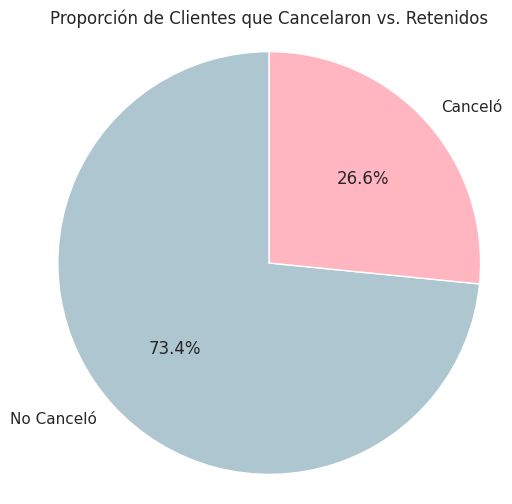

In [33]:
# Gráfico de pastel con paleta pastel
plt.figure(figsize=(6, 6))
churn_counts = df_final['churn'].value_counts()
labels = ['No Canceló', 'Canceló']
colors = ['#AEC6CF', '#FFB6C1']  # Celeste pastel y rosa pastel
plt.pie(
    churn_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Proporción de Clientes que Cancelaron vs. Retenidos')
plt.axis('equal')
plt.show()


**Recuento de evasión por variables categóricas**

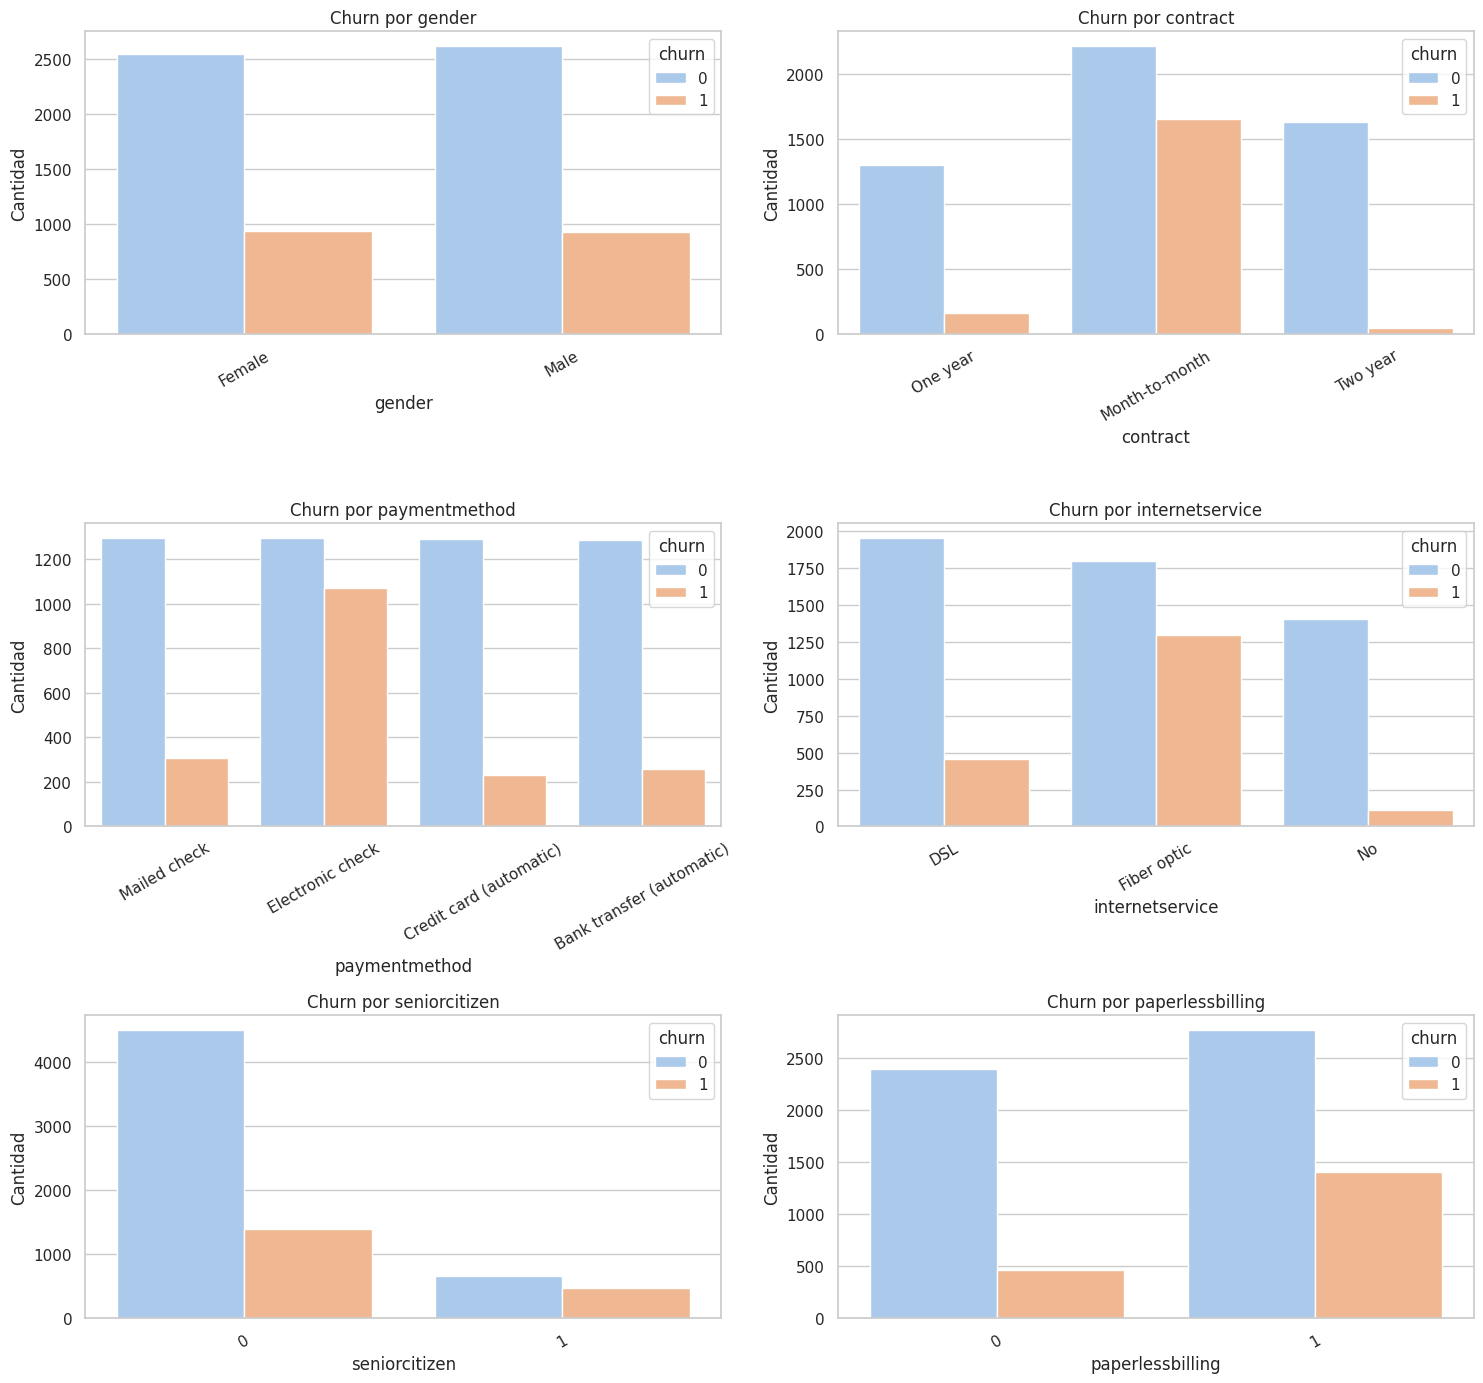

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas a analizar
cat_vars = ['gender', 'contract', 'paymentmethod', 'internetservice',
            'seniorcitizen', 'paperlessbilling']

# Tamaño del gráfico
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 14))
axs = axs.flatten()

# Crear un gráfico para cada variable categórica
for i, var in enumerate(cat_vars):
    sns.countplot(data=df_final, x=var, hue='churn', palette='pastel', ax=axs[i])
    axs[i].set_title(f'Churn por {var}', fontsize=12)
    axs[i].set_ylabel('Cantidad')
    axs[i].set_xlabel(var)
    axs[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


**Conteo de evasión por variables numéricas**

<ipython-input-38-ba3e757bd7b2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-38-ba3e757bd7b2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-38-ba3e757bd7b2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-38-ba3e757bd7b2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


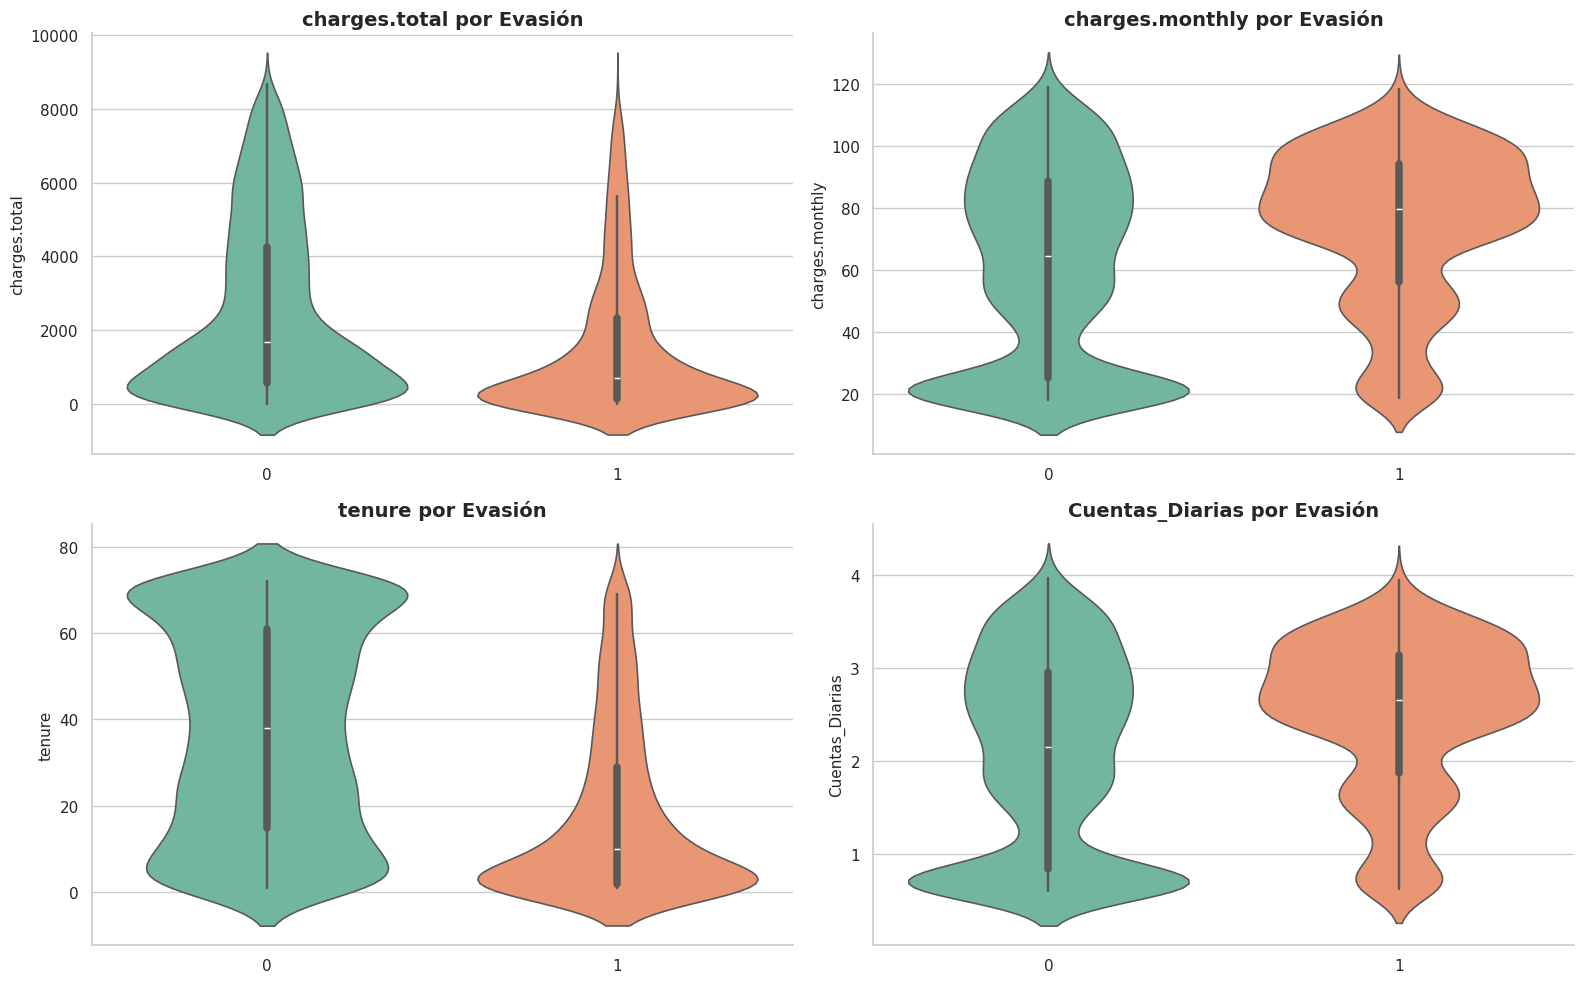

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo general
sns.set(style="whitegrid")

# Variables numéricas
num_vars = ['charges.total', 'charges.monthly', 'tenure', 'Cuentas_Diarias']

# Crear figura
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs = axs.flatten()

# Gráficos mejorados
for i, var in enumerate(num_vars):
    sns.violinplot(
        data=df_final,
        x='churn',
        y=var,
        palette='Set2',
        inner='box',
        linewidth=1.2,
        ax=axs[i]
    )
    axs[i].set_title(f'{var} por Evasión', fontsize=14, fontweight='bold')
    axs[i].set_xlabel('')
    axs[i].set_ylabel(var, fontsize=11)
    sns.despine(ax=axs[i])

plt.tight_layout()
plt.show()


# Informe de Análisis de Evasión de Clientes - Telecom X

## 📝 Introducción

El presente informe tiene como objetivo analizar el fenómeno de **evasión de clientes (churn)** en una empresa de telecomunicaciones ficticia, identificada como *Telecom X*. El churn representa la cantidad de clientes que han cancelado el servicio, un indicador clave que impacta directamente en la rentabilidad de la empresa. Comprender las características de los clientes que se dan de baja permite tomar decisiones estratégicas para mejorar la retención y fidelización.

## 🔧 Limpieza y Tratamiento de Datos

Para garantizar la calidad del análisis, se realizaron los siguientes pasos:

1. **Importación de datos** desde una API proporcionada por el curso.
2. **Revisión de valores nulos**: Se verificó que no existieran datos faltantes.
3. **Conversión de tipos de datos**: Se transformaron las columnas tipo `object` a `string`, y se aseguró la correcta representación de variables numéricas.
4. **Creación de nuevas variables**: Se calculó la columna `Cuentas_Diarias` dividiendo la facturación mensual entre 30.
5. **Estandarización**: Se reemplazaron los valores "Yes" y "No" por 1 y 0, y se renombraron columnas para mejorar la legibilidad.

## 🔍 Análisis Exploratorio de Datos (EDA)

Se realizaron diversas visualizaciones y cálculos estadísticos para comprender la distribución de los datos:

* **Distribución de la variable churn**: Aproximadamente el 26.6% de los clientes abandonaron el servicio.
* **Churn por categorías**: Se identificaron mayores tasas de churn en clientes con contrato mes a mes, uso de "electronic check" como método de pago, y servicios de fibra óptica.
* **Variables numéricas vs churn**: Los clientes que cancelaron el servicio tienden a tener:

  * Menor tiempo de permanencia (`tenure`)
  * Menor total facturado (`charges.total`)
  * Menor valor diario (`Cuentas_Diarias`)

Estas observaciones se respaldaron con gráficos de violín y boxplots que mostraron claras diferencias entre quienes se quedaron y quienes se dieron de baja.

## 📊 Conclusiones e Insights

1. **Clientes con contrato mes a mes** tienen una probabilidad significativamente mayor de cancelar.
2. **El tiempo de permanencia** es un factor clave: cuanto menor es el tenure, mayor la tasa de churn.
3. **El método de pago** "electronic check" se asocia con mayor cancelación que otras formas automáticas.
4. **Servicios de fibra óptica** están vinculados con mayor churn, posiblemente por costos o estabilidad del servicio.

## 🔮 Recomendaciones Estratégicas

* **Fomentar contratos a largo plazo** ofreciendo descuentos o beneficios exclusivos.
* **Crear programas de fidelización** para nuevos clientes durante los primeros meses, reduciendo el churn temprano.
* **Incentivar el uso de pagos automáticos** como tarjetas o transferencias bancarias, reduciendo fricciones.
* **Investigar y mejorar la experiencia del servicio de fibra óptica**, buscando reducir cancelaciones por insatisfacción.
* **Implementar sistemas de alerta temprana** para identificar clientes en riesgo y activar acciones de retención.

---


